# A notebook to identify two different anatomical structures to show in Fig. 1g

Goal: Identify two AS in the same organ that have a low cosine similarity in terms of cell type population

## `import` statements

In [135]:
from pprint import pprint
import pandas as pd
import requests
from io import StringIO
import seaborn as sns 
import matplotlib.pyplot as plt

## Load hra-pop data

### AS-AS similarities

In [136]:
# make sure https://github.com/x-atlas-consortia/hra-pop/tree/main/ is cloned to the same root folder as this repository
# let's read this report that lists AS-AS similarities for all AS in HRApop
df_similarity_report = pd.read_csv("../../hra-pop/output-data/v0.10.2/reports/atlas/figure-as-as-sim.csv")

# let's sort by cosime similarity so we can find two instances with a low cosine similarity
df_similarity_report = df_similarity_report.sort_values(by="cosine_sim")

df_similarity_report_filtered = df_similarity_report[(
    df_similarity_report['organ'] == "heart") & (df_similarity_report['sex'] == "Male")]
print(df_similarity_report_filtered)

            organId  organ   sex            modality              as1_label  \
160  UBERON:0000948  heart  Male  sc_transcriptomics    left cardiac atrium   
105  UBERON:0000948  heart  Male  sc_transcriptomics    left cardiac atrium   
186  UBERON:0000948  heart  Male  sc_transcriptomics   right cardiac atrium   
107  UBERON:0000948  heart  Male  sc_transcriptomics   right cardiac atrium   
168  UBERON:0000948  heart  Male  sc_transcriptomics    left cardiac atrium   
170  UBERON:0000948  heart  Male  sc_transcriptomics   right cardiac atrium   
162  UBERON:0000948  heart  Male  sc_transcriptomics   heart left ventricle   
103  UBERON:0000948  heart  Male  sc_transcriptomics  heart right ventricle   
172  UBERON:0000948  heart  Male  sc_transcriptomics   right cardiac atrium   
158  UBERON:0000948  heart  Male  sc_transcriptomics  heart right ventricle   

                   as2_label  cosine_sim  as1_dataset_count  as2_dataset_count  
160  interventricular septum    0.318037         

### Load cell type populations for AS

In [137]:
# Get data via grlc
url = "https://grlc.io/api-git/hubmapconsortium/ccf-grlc/subdir/hra-pop//cell_types_in_anatomical_structurescts_per_as.csv"

# Make the HTTP GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the CSV data into a DataFrame
    data = StringIO(response.text)
    df_hra_api = pd.read_csv(data)
    print(df_hra_api.head())  # Print the first few rows of the DataFrame
else:
    print(f"Failed to retrieve data: {response.status_code}")

             organ                                             as as_label  \
0  Large Intestine  http://purl.obolibrary.org/obo/UBERON_0001153   caecum   
1  Large Intestine  http://purl.obolibrary.org/obo/UBERON_0001153   caecum   
2  Large Intestine  http://purl.obolibrary.org/obo/UBERON_0001153   caecum   
3  Large Intestine  http://purl.obolibrary.org/obo/UBERON_0001153   caecum   
4  Large Intestine  http://purl.obolibrary.org/obo/UBERON_0001153   caecum   

      sex        tool            modality  \
0  Female  celltypist  sc_transcriptomics   
1  Female  celltypist  sc_transcriptomics   
2  Female  celltypist  sc_transcriptomics   
3  Female  celltypist  sc_transcriptomics   
4  Female  celltypist  sc_transcriptomics   

                                             cell_id           cell_label  \
0         https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-         SMC (PLPP2+)   
1  https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...  Cycling plasma cell   
2  https://purl.org/ccf/ASCTB

## Functions

In [138]:
def get_cell_type_population(as_label: str, tool:str, sex:str, hra_api_response: pd.DataFrame):
    """Gets the cell type population for the provided as_label (string) from the HRA API

    Args:
                    as_label (str): human-readable label for the desired anatomical structure
    """
    # set up the result as a dict
    result = {
        'Cell Type': [],
        'Anatomical Structure': [],
        'Cell Percentage': []
    } 
    
    # filter
    filtered_df = hra_api_response[(hra_api_response['as_label'] == as_label) & (hra_api_response['tool'] == tool) & (hra_api_response['sex'] == sex)]
    
    # get cell type and percentage pairs
    values = filtered_df[['cell_label', 'cell_percentage']]
    
    result['Cell Type'] = values['cell_label']
    result['Anatomical Structure'] = [as_label] * len(values['cell_label'])
    result['Cell Percentage'] = values['cell_percentage']

    return pd.DataFrame(result)

## Prepare the data for visualization

In [139]:
# Filter the right data
as_label_1 = "left cardiac atrium"
as_label_2 = "interventricular septum"
tool = "azimuth"
sex = "Female"

# get cell types and percentages for both
as_1_cells = get_cell_type_population(as_label_1, tool, sex, df_hra_api)
as_2_cells = get_cell_type_population(as_label_2, tool, sex, df_hra_api)

print(as_1_cells)
print(as_2_cells)

concatenated_df = pd.concat([as_1_cells, as_2_cells], ignore_index=True)
concatenated_df
# outer_merged = pd.merge(as_1_cells, as_1_cells, on='Cell Type')

# outer_merged

                      Cell Type Anatomical Structure  Cell Percentage
1154       Atrial Cardiomyocyte  left cardiac atrium         0.321545
1155                   Pericyte  left cardiac atrium         0.187391
1156                 Fibroblast  left cardiac atrium         0.147331
1157      Capillary Endothelial  left cardiac atrium         0.124877
1158              Smooth Muscle  left cardiac atrium         0.046232
1159               Monocyte/cDC  left cardiac atrium         0.026429
1160                 Macrophage  left cardiac atrium         0.025899
1161                  Adipocyte  left cardiac atrium         0.022454
1162                   Neuronal  left cardiac atrium         0.018099
1163                          T  left cardiac atrium         0.015411
1164  Ventricular Cardiomycoyte  left cardiac atrium         0.011700
1165                Endocardial  left cardiac atrium         0.011587
1166                         NK  left cardiac atrium         0.011473
1167         Venous 

,Cell Type,Anatomical Structure,Cell Percentage
0,Atrial Cardiomyocyte,left cardiac atrium,0.321545
1,Pericyte,left cardiac atrium,0.187391
2,Fibroblast,left cardiac atrium,0.147331
3,Capillary Endothelial,left cardiac atrium,0.124877
4,Smooth Muscle,left cardiac atrium,0.046232
5,Monocyte/cDC,left cardiac atrium,0.026429
6,Macrophage,left cardiac atrium,0.025899
7,Adipocyte,left cardiac atrium,0.022454
8,Neuronal,left cardiac atrium,0.018099
9,T,left cardiac atrium,0.015411


## Visualize

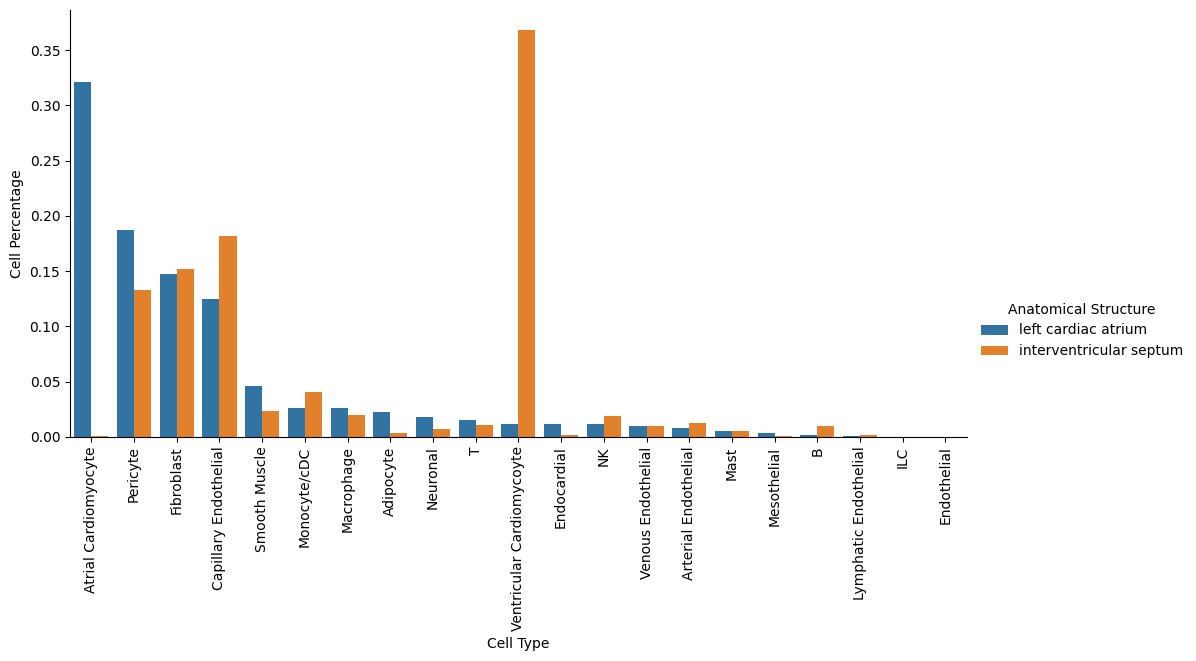

In [140]:
# create grouped bar graph using seaborn
plot = sns.catplot(
    data=concatenated_df,
    x='Cell Type',
    y='Cell Percentage',
    hue='Anatomical Structure',
    kind='bar',
    height=5,
    aspect=2,
)

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# render the plot
plt.show()